In [1]:
from __future__ import annotations
from scraping_kit.utils import get_datetime
from scraping_kit.graph_follow import GraphFollows, KWClusters
from scraping_kit.utils_loader import load_db_and_bots, load_profiles

db_tw, bots = load_db_and_bots()
profiles = load_profiles(db_tw.path_data)

Collection Names: ['tweet_user', 'topics_user', 'raw', 'cursors', 'trends', 'search', 'user', 'user_suspended', 'topics', 'follows']
Bots: bots=[BotScraper(acc_name='Vera')]


In [2]:
date_i = get_datetime(year=2024, month=1, day=13)
date_f = get_datetime(year=2024, month=1, day=20)
N_BESTS_USERS = 40

# Secondary variables.
MAX_WORKERS = 40
DAYS_TO_UPDATE_TWEETS = 14
DAYS_TO_UPDATE_FOLLOWS_LINK = 120
WITH_UPDATE = True      # If it is false, it will do the analysis with what you have downloaded.

- `date_i:` Initial date where tweets are considered.
- `date_f:` Final date where tweets are considered.
- `N_BESTS_USERS:` TOP users with the most followers in the graph analysis. <span style="color:crimson;">IMPORTANT!!! Then read the warning.</span>
- `MAX_WORKERS:` Number of requests that can be made in parallel, use between `10~40`. The higher the faster, but you can saturate the API server and get blocked.
- `DAYS_TO_UPDATE_TWEETS:` Time after collecting a user. It is not expensive, you can choose a low number, `7~14`.
- `DAYS_TO_UPDATE_FOLLOWS_LINK:` Time after which followers are updated. Using a high number `>120 or >180`, it is expensive to collect.
- `WITH_UPDATE:` Use `False` if you only want to view information `and not collect` it.


##### <span style="color:crimson;">WARNING: (N_BESTS_USERS)</span>
1. ---> `Remember that you have a quota of 100k requests per month.`
2. From the list you send you will always get the latest Tweets from each one, but it will only look for many-to-many followers, among the TOP you determine.
3. Then the system makes `N*(N-1)` requests, where `N=N_BESTS_USERS`.
4. If the link between `User_A` and `User_B` was already collected, it does `not make the request`.
4. If you choose a very high number, you can consume all the monthly requests, I attach a table with the number of requests by value.
5. **<span style="color:green;">Note that: I would use a low value, and increase it little by little, collecting information and seeing how the graph changes.</span>**

|N_BESTS_USERS|N_REQUESTS|
|-------------|----------|
|20           |<= 380    |
|40           |<= 1560   |
|60           |<= 3540   |
|80           |<= 6320   |
|100          |<= 9900   |
|120          |<= 14280  |
|140          |<= 19460  |
|160          |<= 25440  |
|180          |<= 32220  |
|200          |<= 39800  |
- The `graph will be plotted` with the `TOP` of `N_BESTS_USERS`


### Collect and obtain the users with the most followers.

In [3]:
users = db_tw.collect_and_get_users(
    profiles = profiles,
    bots = bots,
    date_i = date_i,
    date_f = date_f,
    n_bests_users = N_BESTS_USERS,
    days_to_update_tweets = DAYS_TO_UPDATE_TWEETS,
    days_to_update_follow_link = DAYS_TO_UPDATE_FOLLOWS_LINK,
    with_update = WITH_UPDATE,
    max_workers = MAX_WORKERS
)
graph_follow = GraphFollows.from_users_db(db_tw, users, date_i, date_f)

~~~~~Start Scraping Users~~~~~
927/927
Completed: 927/927
1/1560 | Existing link - Skip.
2/1560 | Existing link - Skip.
3/1560 | Existing link - Skip.
4/1560 | Existing link - Skip.
5/1560 | Existing link - Skip.
6/1560 | Existing link - Skip.
7/1560 | Existing link - Skip.
8/1560 | Existing link - Skip.
9/1560 | Existing link - Skip.
10/1560 | Existing link - Skip.
11/1560 | Existing link - Skip.
12/1560 | Existing link - Skip.
13/1560 | Existing link - Skip.
14/1560 | Existing link - Skip.
15/1560 | Existing link - Skip.
16/1560 | Existing link - Skip.
17/1560 | Existing link - Skip.
18/1560 | Existing link - Skip.
19/1560 | Existing link - Skip.
20/1560 | Existing link - Skip.
21/1560 | Existing link - Skip.
22/1560 | Existing link - Skip.
23/1560 | Existing link - Skip.
24/1560 | Existing link - Skip.
25/1560 | Existing link - Skip.
26/1560 | Existing link - Skip.
27/1560 | Existing link - Skip.
28/1560 | Existing link - Skip.
29/1560 | Existing link - Skip.
30/1560 | Existing link

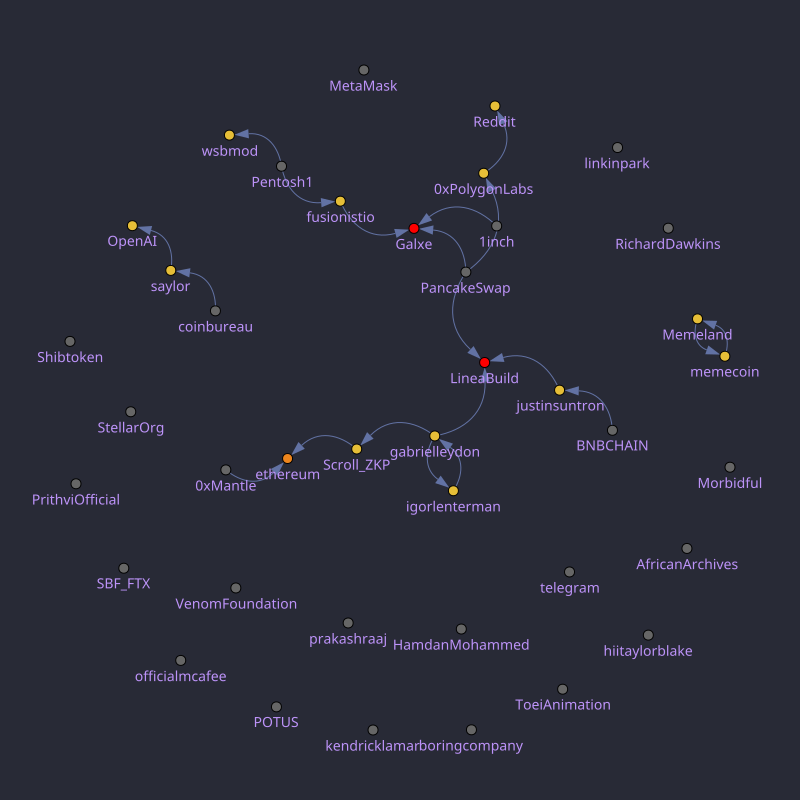

In [4]:
colors_ranges = [
    (0, "#666666"),
    (1, "#E6BE37"),
    (2, "#ED851D"),
    (3, "#FF0000"),
]
MODE_PLOT_GRAPH = 'in'      # Can use 'in', 'out' or 'sum'.
WITH_SAVE = True

cairo_plot = graph_follow.plot(
    with_save = WITH_SAVE,
    colors_ranges = colors_ranges,
    mode = MODE_PLOT_GRAPH
)
cairo_plot

### Keywords

In [5]:
MIN_USERS_PER_CLUSTER = 2
kw_clusters = KWClusters.from_graph_follow(graph_follow, MIN_USERS_PER_CLUSTER)
graph_follow.save_keywords_users()
kw_clusters.save_keywords_clusters()
kw_clusters

Cluster(idx=0 | n_users=16 | users=['justinsuntron', 'BNBCHAIN', 'ethereum', '0xPolygonLabs', 'PancakeSwap', '1inch', 'Galxe', 'Reddit', 'gabrielleydon', 'LineaBuild', 'Pentosh1', 'wsbmod', 'fusionistio', 'Scroll_ZKP', 'igorlenterman', '0xMantle'])
Cluster(idx=1 | n_users=3 | users=['saylor', 'OpenAI', 'coinbureau'])
Cluster(idx=2 | n_users=2 | users=['Memeland', 'memecoin'])

### Topics Users

In [6]:
users.df_topics_users()

,profile,topic_1_a,topic_1_b,topic_2_a,topic_2_b
0,POTUS,news,business & finance,Business & finance news,Business & finance news
1,kendricklamar,arts & culture,news,Music news,Arts and culture news
2,linkinpark,music,entertainment,Music news,Music
3,HamdanMohammed,news,careers,Movie news,Social movements
4,Shibtoken,news,entertainment,Digital creators,Local news
5,justinsuntron,,,,
6,BNBCHAIN,,,,
7,saylor,,,,
8,ethereum,,,,
9,OpenAI,,,,
